In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv


In [2]:
#Econ data science project
data1 = pd.read_csv('/kaggle/input/africa-economic-banking-and-systemic-crisis-data/african_crises.csv')

Motivation for this exploration: <br/>
Learnt in principles of economics that exchange rate could related to inflation
Here, annual cpi inflation is used to represent inflation <br/>
That is, the cpi represents the amount that a consumer would pay for a consumer basket of goods <br/>
Hence, a higher cpi would indicate inflation
In times of inflation, it would mean that people are paying higher prices than before for the same amount of goods <br/>
It would also mean that the aggregate demand has increased far beyond the GDP of the country(ie, ouput is far above the optimum level of employment <br/>
For exchange rates(in this case, comparing to the US dollar), a strong currency should ideally have a low currency exchange rate
That is, if for 1 dollar that is exchanged, a US consumer or visitor in another country can get more value in the foreign country,it indicates that the foreign country currency is less strong compared to the US dollar <br/>
But a weak currency may be beneficial in cases where a country wants to export more of its goods(expand its export market) and generally encourage more people to buy their goods <br/>
So other countries can import more goods from the country with an undervalued currency because the goods would be relatively cheaper <br/>


How inflation relates to interest rates : <br/>



In [3]:
print(data1.head())

   case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0   

In [4]:
data1['country'].value_counts()

country
Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: count, dtype: int64

In [5]:
data1['country'].value_counts().mode()

0    75
Name: count, dtype: int64

In [6]:
#removed year columns so as to only consider values after 2000
#data1.drop(['independence','cc3','currency_crises','gdp_weighted_default'],axis='column')
#data1
for val in data1['year']:
    if val < 2000:
        data1=data1[data1['year']>=2000]
data1.drop(['independence','cc3'],axis=1,inplace=True)
data1
#grouping some countries and their attributes into lists and converting the lists into dataframes

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,currency_crises,inflation_crises,banking_crisis
70,1,Algeria,2000,0,75.3428,0,0,0.0,0.300,0,0,no_crisis
71,1,Algeria,2001,0,77.8196,0,0,0.0,4.200,0,0,no_crisis
72,1,Algeria,2002,0,79.7234,0,0,0.0,1.430,0,0,no_crisis
73,1,Algeria,2003,0,72.6128,0,0,0.0,4.259,0,0,no_crisis
74,1,Algeria,2004,0,72.6137,0,0,0.0,3.972,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,Zimbabwe,2009,1,354.8000,1,1,0.0,-7.670,1,0,crisis
1055,70,Zimbabwe,2010,0,378.2000,1,1,0.0,3.217,0,0,no_crisis
1056,70,Zimbabwe,2011,0,361.9000,1,1,0.0,4.920,0,0,no_crisis
1057,70,Zimbabwe,2012,0,361.9000,1,1,0.0,3.720,0,0,no_crisis


In [7]:
#function to group a country by its attributes(ie, when i put in the name of a country,a subset of only that country's attributes should be created)
def group_country(data1,country_name):
    subset_country = data1[(data1['country']==country_name) & (data1['year']>=2004)]
    return subset_country
#find relationship between the inflation cpi and exhange rate

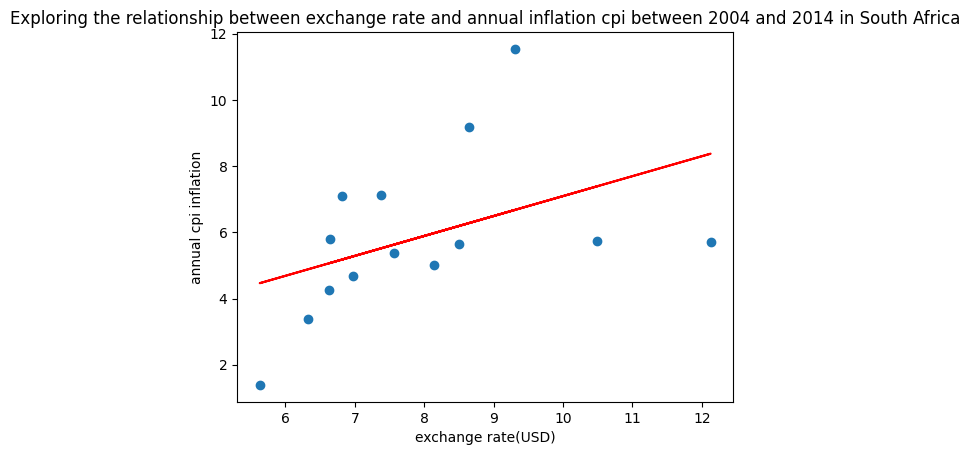

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import sklearn
#group_country(data1,'South Africa')
South_Africa_data = data1[data1['country']=='South Africa']
x=South_Africa_data['exch_usd']
y=South_Africa_data['inflation_annual_cpi']
plt.xlabel('exchange rate(USD)')
plt.ylabel('annual cpi inflation')
plt.title('Exploring the relationship between exchange rate and annual inflation cpi between 2004 and 2014 in South Africa')
plt.scatter(x,y)
a,b = np.polyfit(x,y,1) # 1 here meaning a 1st degree polynomial ie, linear
plt.plot(x,a*x+b, color= 'red') #finding line of best fit by creating a function in the form y=mx+c
plt.show()

In [9]:
#finding the Pearson correlation coefficient of exchange rate and inflation cpi
#print(South_Africa_data['exch_usd'].corr(South_Africa_data['inflation_annual_cpi']))
South_Africa_corr = South_Africa_data['exch_usd'].corr(South_Africa_data['inflation_annual_cpi'])

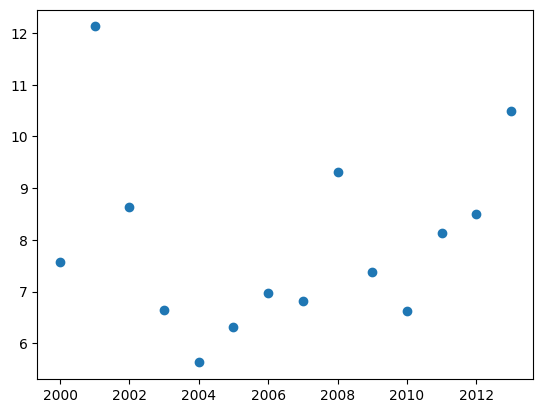

In [10]:
#just wanted to see how the exchange rate varied over time
plt.scatter(x=South_Africa_data['year'],y=South_Africa_data['exch_usd'])
plt.show()

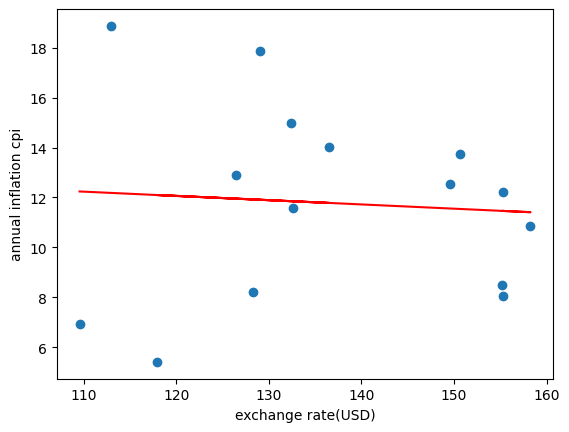

In [11]:
#is there a correlation between annual inflation cpi and exchange rate
#how does this correlation change if a country has a very high exchange rate versus a country that has a very low exchange rate
from matplotlib import pyplot as plt
import numpy as np
import sklearn
Nigeria_data = data1[data1['country']=='Nigeria']
x=Nigeria_data['exch_usd']
y=Nigeria_data['inflation_annual_cpi']
plt.xlabel('exchange rate(USD)')
plt.ylabel('annual inflation cpi')
a,b = np.polyfit(x,y,1)
plt.scatter(x,y)
plt.plot(x,a*x+b,color='red')
plt.show()

In [12]:
#finding Pearson correlation for exch rate and inflation cpi: Nigeria
#print(Nigeria_data['exch_usd'].corr(Nigeria_data['inflation_annual_cpi']))
Nigeria_corr = Nigeria_data['exch_usd'].corr(Nigeria_data['inflation_annual_cpi'])

In [13]:
#checking the countries in this dataset
unique_countries = data1.drop_duplicates(subset=['country'])['country']
unique_countries

70                       Algeria
147                       Angola
205     Central African Republic
268                  Ivory Coast
423                        Egypt
490                        Kenya
558                    Mauritius
633                      Morocco
693                      Nigeria
808                 South Africa
882                      Tunisia
954                       Zambia
1045                    Zimbabwe
Name: country, dtype: object

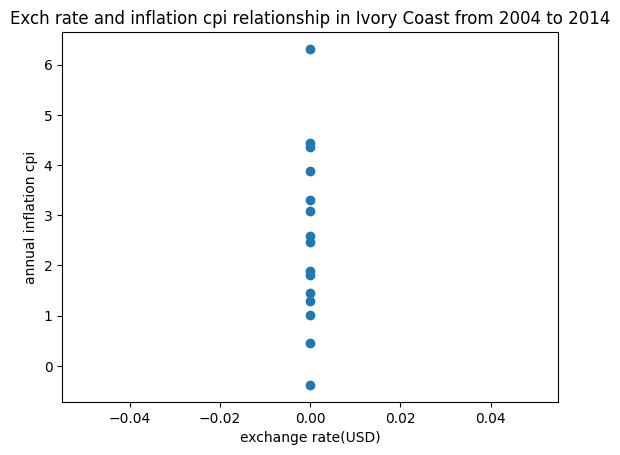

In [14]:
Ivory_coast_data = data1[data1['country']=='Ivory Coast']
plt.xlabel('exchange rate(USD)')
plt.ylabel('annual inflation cpi')
plt.title('Exch rate and inflation cpi relationship in Ivory Coast from 2004 to 2014')
plt.scatter(x=Ivory_coast_data['exch_usd'],y=Ivory_coast_data['inflation_annual_cpi'])
plt.show()
#the graph is like this because there is no data for exchange rate for Ivory Coast
#maybe would remove country columns corresponding to Ivory coast because there's no data for its exchange rates

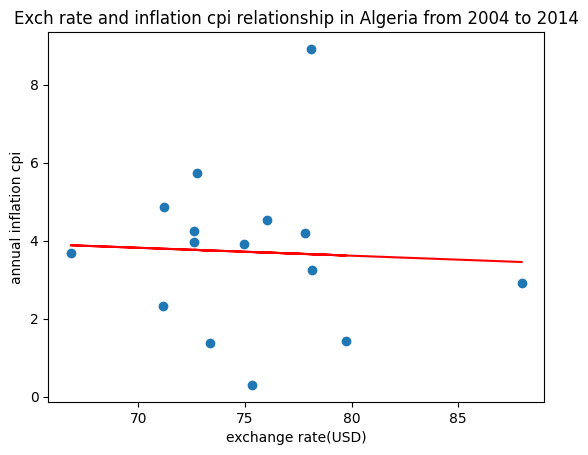

In [15]:
Algeria_data=data1[data1['country']=='Algeria']
x=Algeria_data['exch_usd']
y=Algeria_data['inflation_annual_cpi']
plt.xlabel('exchange rate(USD)')
plt.ylabel('annual inflation cpi')
plt.title('Exch rate and inflation cpi relationship in Algeria from 2004 to 2014')
plt.scatter(x,y)
a,b=np.polyfit(x,y,1)
plt.plot(x,a*x+b,color='red')
plt.show()

In [16]:
#finding Pearson correlation coefficient for exch rate and inflation cpi in Algeria
#print(Algeria_data['exch_usd'].corr(Algeria_data['inflation_annual_cpi']))
Algeria_corr = Algeria_data['exch_usd'].corr(Algeria_data['inflation_annual_cpi'])

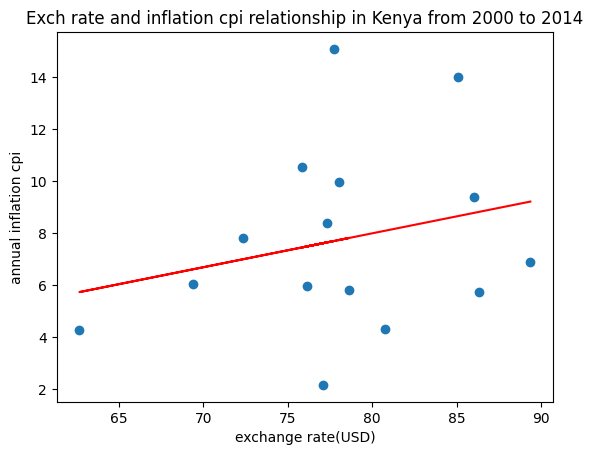

In [17]:
Kenya_data = data1[data1['country']=='Kenya']
#Kenya_data
#sometimes when inflation is low, and vice versa
x=Kenya_data['exch_usd']
y=Kenya_data['inflation_annual_cpi']
plt.xlabel('exchange rate(USD)')
plt.ylabel('annual inflation cpi')
plt.title('Exch rate and inflation cpi relationship in Kenya from 2000 to 2014')
plt.scatter(x,y)
a,b =np.polyfit(x,y,1)
plt.plot(x,a*x+b,color='red')
plt.show()

In [18]:
#finding Pearson correlation coefficient for Kenya values
#print(Kenya_data['exch_usd'].corr(Kenya_data['inflation_annual_cpi']))
Kenya_corr = Kenya_data['exch_usd'].corr(Kenya_data['inflation_annual_cpi'])

In [19]:
Kenya_data

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,currency_crises,inflation_crises,banking_crisis
490,35,Kenya,2000,0,78.036100,0,1,0.0,9.955,0,0,no_crisis
491,35,Kenya,2001,0,78.600000,0,0,0.0,5.824,0,0,no_crisis
492,35,Kenya,2002,0,77.072200,0,0,0.0,2.156,0,0,no_crisis
493,35,Kenya,2003,0,76.138900,0,0,0.0,5.983,0,0,no_crisis
494,35,Kenya,2004,0,77.344400,0,0,0.0,8.381,0,0,no_crisis
495,35,Kenya,2005,0,72.366700,0,0,0.0,7.823,0,0,no_crisis
496,35,Kenya,2006,0,69.396700,0,0,0.0,6.041,0,0,no_crisis
497,35,Kenya,2007,0,62.675000,0,0,0.0,4.265,0,0,no_crisis
498,35,Kenya,2008,0,77.711111,0,0,0.0,15.101,1,0,no_crisis
499,35,Kenya,2009,0,75.820000,0,0,0.0,10.552,0,0,no_crisis


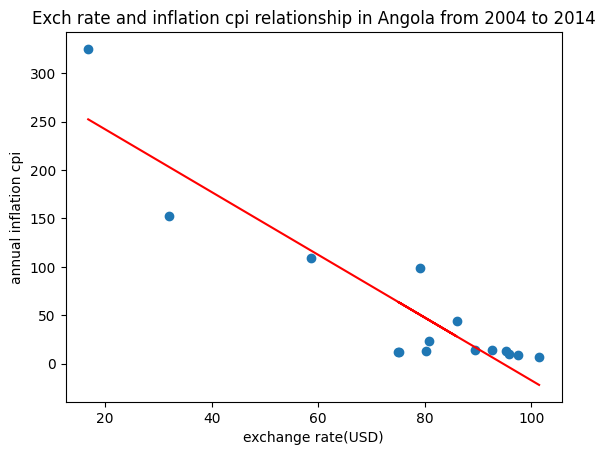

In [20]:
Angola_data = data1[data1['country']=='Angola']
#Angola_data
#here when exchange rate is increasing, there seems to be a corresponding decrease in cpi as well(maybe a clearer relationship than Kenya)
x=Angola_data['exch_usd']
y=Angola_data['inflation_annual_cpi']
plt.xlabel('exchange rate(USD)')
plt.ylabel('annual inflation cpi')
plt.title('Exch rate and inflation cpi relationship in Angola from 2004 to 2014')
plt.scatter(x,y)
a,b = np.polyfit(x,y,1)
plt.plot(x,a*x+b,color='red')
plt.show()

In [21]:
#finding pearson correlation coefficient for Angola variables
#print(Angola_data['exch_usd'].corr(Angola_data['inflation_annual_cpi']))
Angola_corr = Angola_data['exch_usd'].corr(Angola_data['inflation_annual_cpi'])

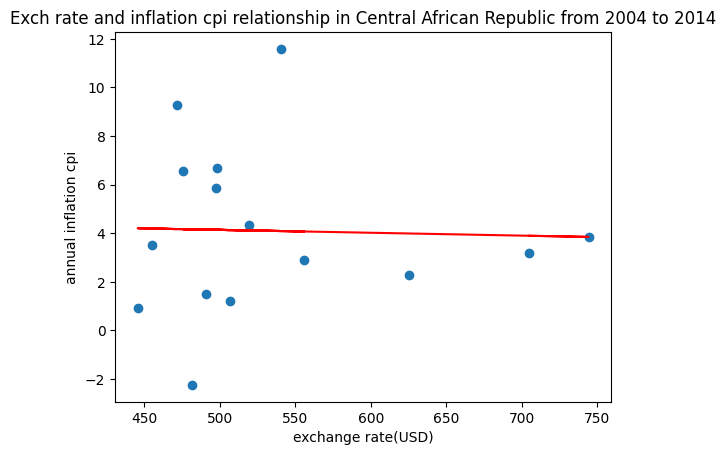

In [22]:
CAR_data = data1[data1['country']=='Central African Republic']
x=CAR_data['exch_usd']
y=CAR_data['inflation_annual_cpi']
plt.xlabel('exchange rate(USD)')
plt.ylabel('annual inflation cpi')
plt.title('Exch rate and inflation cpi relationship in Central African Republic from 2004 to 2014')
plt.scatter(x,y)
a,b=np.polyfit(x,y,1)
plt.plot(x,a*x+b,color='red')
plt.show()
#data points are concentrated at low exchange rates and high inflation cpi values(although these exchange rate values are higher compared to the other countries)

In [23]:
#Pearson correlation coefficient for Central African Republic variables
#print(CAR_data['exch_usd'].corr(CAR_data['inflation_annual_cpi']))
CAR_corr = CAR_data['exch_usd'].corr(CAR_data['inflation_annual_cpi'])

In [24]:
CAR_data
#here, there are very high exchange rates(figures here are higher than the other countries)
#there is also very low cpi, and even some negative cpi inflation values, how is this possible?
#the data also shows 'no crisis' throughout all the years, even though exchange rate values continued to be so high?


,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,currency_crises,inflation_crises,banking_crisis
205,10,Central African Republic,2000,0,704.951102,0,1,0.0,3.202,0,0,no_crisis
206,10,Central African Republic,2001,0,744.306139,0,1,0.0,3.843,0,0,no_crisis
207,10,Central African Republic,2002,0,625.495375,0,1,0.0,2.298,0,0,no_crisis
208,10,Central African Republic,2003,0,519.364212,0,1,0.0,4.353,0,0,no_crisis
209,10,Central African Republic,2004,0,481.577711,0,1,0.0,-2.244,0,0,no_crisis
210,10,Central African Republic,2005,0,556.037128,0,1,0.0,2.885,0,0,no_crisis
211,10,Central African Republic,2006,0,498.069096,0,1,0.0,6.694,0,0,no_crisis
212,10,Central African Republic,2007,0,445.592691,0,1,0.0,0.935,0,0,no_crisis
213,10,Central African Republic,2008,0,471.335058,0,1,0.0,9.262,0,0,no_crisis
214,10,Central African Republic,2009,0,455.335971,0,1,0.0,3.522,0,0,no_crisis


**Why are some countries showing a relatively strong correlation between cpi inflation and exchange rate, and why are others showing a weak correlation? <br/>
Is this correlation also related to the likelihood of a country in this dataset to experience a banking crisis?**

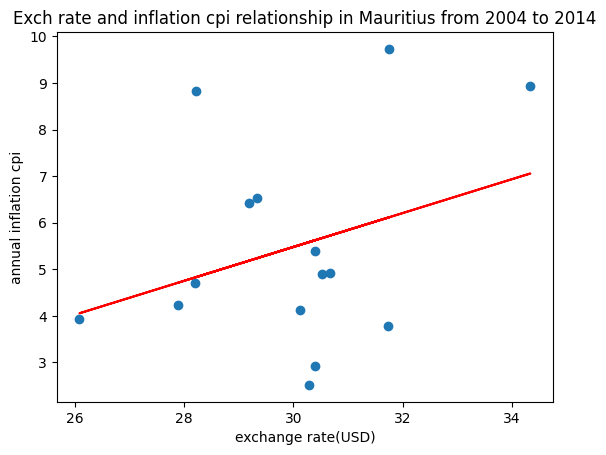

In [25]:
Mauritius_data = data1[data1['country']=='Mauritius']
x=Mauritius_data['exch_usd']
y=Mauritius_data['inflation_annual_cpi']
plt.title('Exch rate and inflation cpi relationship in Mauritius from 2004 to 2014')
plt.xlabel("exchange rate(USD)")
plt.ylabel('annual inflation cpi')
plt.scatter(x,y)
a,b = np.polyfit(x,y,1)
plt.plot(x,a*x+b,color='red')
plt.show()

In [26]:
#Pearson correlation coefficient for Mauritius variables
#print(Mauritius_data['exch_usd'].corr(Mauritius_data['inflation_annual_cpi']))
Mauritius_corr = Mauritius_data['exch_usd'].corr(Mauritius_data['inflation_annual_cpi'])

In [27]:
Mauritius_data
# or data1.loc[558:572]

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,currency_crises,inflation_crises,banking_crisis
558,38,Mauritius,2000,0,27.881700,0,0,0.0,4.230,0,0,no_crisis
559,38,Mauritius,2001,0,30.394200,0,0,0.0,5.391,0,0,no_crisis
560,38,Mauritius,2002,0,29.196800,0,0,0.0,6.414,0,0,no_crisis
561,38,Mauritius,2003,0,26.087700,0,0,0.0,3.931,0,0,no_crisis
562,38,Mauritius,2004,0,28.204400,0,0,0.0,4.703,0,0,no_crisis
563,38,Mauritius,2005,0,30.666600,0,0,0.0,4.921,0,0,no_crisis
564,38,Mauritius,2006,0,34.336800,0,0,0.0,8.930,0,0,no_crisis
565,38,Mauritius,2007,0,28.216200,0,0,0.0,8.827,0,0,no_crisis
566,38,Mauritius,2008,0,31.755500,0,0,0.0,9.731,0,0,no_crisis
567,38,Mauritius,2009,0,30.290500,0,0,0.0,2.516,0,0,no_crisis


In [28]:
Morroco_data = data1[data1['country']=='Morroco']
Morroco_data

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,currency_crises,inflation_crises,banking_crisis


Seems that Morocco has no data (null values)

In [29]:
data1.loc[634:632]

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,currency_crises,inflation_crises,banking_crisis


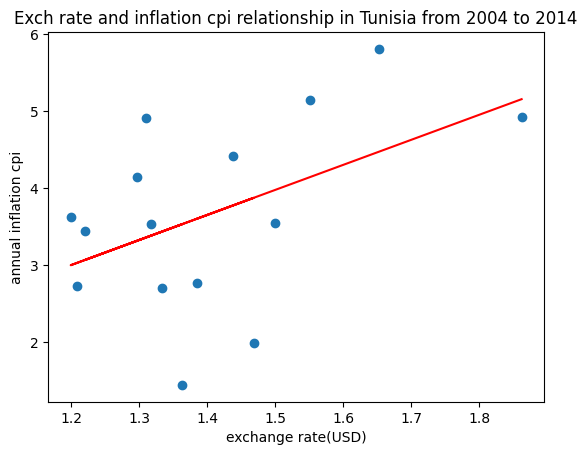

In [30]:
Tunisia_data =data1[data1['country']=='Tunisia']
x=Tunisia_data['exch_usd']
y=Tunisia_data['inflation_annual_cpi']
plt.xlabel('exchange rate(USD)')
plt.ylabel('annual inflation cpi')
plt.title('Exch rate and inflation cpi relationship in Tunisia from 2004 to 2014')
plt.scatter(x,y)
a,b=np.polyfit(x,y,1)
plt.plot(x,a*x+b,color='red')
plt.show()

In [31]:
#Pearson correlation coefficient for Tunisia variables
#print(Tunisia_data['exch_usd'].corr(Tunisia_data['inflation_annual_cpi']))
Tunisia_corr = Tunisia_data['exch_usd'].corr(Tunisia_data['inflation_annual_cpi'])

In [32]:
Tunisia_data

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,currency_crises,inflation_crises,banking_crisis
882,63,Tunisia,2000,0,1.385300,0,0,0.0,2.770,0,0,no_crisis
883,63,Tunisia,2001,0,1.468300,0,0,0.0,1.987,0,0,no_crisis
884,63,Tunisia,2002,0,1.334100,0,0,0.0,2.706,0,0,no_crisis
885,63,Tunisia,2003,0,1.208300,0,0,0.0,2.724,0,0,no_crisis
886,63,Tunisia,2004,0,1.199400,0,0,0.0,3.621,0,0,no_crisis
887,63,Tunisia,2005,0,1.363400,0,0,0.0,1.444,0,0,no_crisis
888,63,Tunisia,2006,0,1.297100,0,0,0.0,4.143,0,0,no_crisis
889,63,Tunisia,2007,0,1.220700,0,0,0.0,3.438,0,0,no_crisis
890,63,Tunisia,2008,0,1.309900,0,0,0.0,4.913,0,0,no_crisis
891,63,Tunisia,2009,0,1.317300,0,0,0.0,3.530,0,0,no_crisis


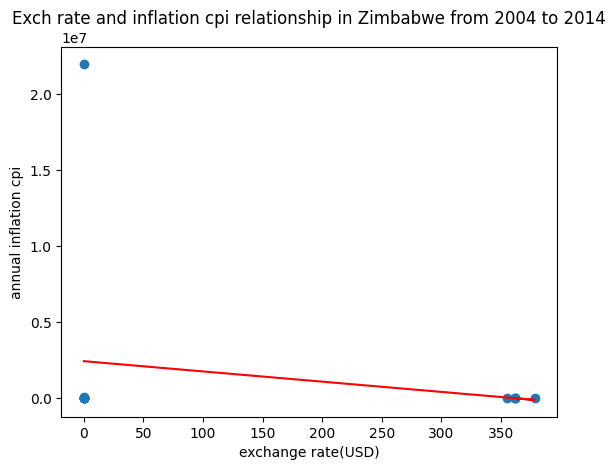

In [33]:
Zimbabwe_data = data1[data1['country']=='Zimbabwe']
#I vaguely remember something about Zimbabwe's currency and how it was devalued due to inflation?
x=Zimbabwe_data['exch_usd']
y=Zimbabwe_data['inflation_annual_cpi']
plt.xlabel('exchange rate(USD)')
plt.ylabel('annual inflation cpi')
plt.title('Exch rate and inflation cpi relationship in Zimbabwe from 2004 to 2014')
plt.scatter(x,y)
a,b = np.polyfit(x,y,1)
plt.plot(x,a*x+b,color='red')
plt.show()

In [34]:
#Pearson correlation coefficient for Zimbabwe values
#print(Zimbabwe_data['exch_usd'].corr(Zimbabwe_data['inflation_annual_cpi']))
Zimbabwe_corr = Zimbabwe_data['exch_usd'].corr(Zimbabwe_data['inflation_annual_cpi'])

In [35]:
Zimbabwe_data
#showing very different values when compared to the other countries
#very low exchange rate values, but they don't seem to correlate with the annual inflation cpi values(inconsistent; low and high)

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,currency_crises,inflation_crises,banking_crisis
1045,70,Zimbabwe,2000,1,5.500000e-25,1,1,0.0,5.520370e+01,1,1,crisis
1046,70,Zimbabwe,2001,1,5.510000e-25,1,1,0.0,1.121184e+02,0,1,crisis
1047,70,Zimbabwe,2002,1,5.500000e-25,1,1,0.0,1.989286e+02,0,1,crisis
1048,70,Zimbabwe,2003,1,7.950000e-24,1,1,0.0,5.987448e+02,1,1,crisis
1049,70,Zimbabwe,2004,1,5.600000e-23,1,1,0.0,1.327468e+02,1,1,crisis
1050,70,Zimbabwe,2005,1,8.460000e-22,1,1,0.0,5.858444e+02,1,1,crisis
1051,70,Zimbabwe,2006,1,3.000000e-19,1,1,0.0,1.281114e+03,1,1,crisis
1052,70,Zimbabwe,2007,1,1.900000e-16,1,1,0.0,6.627989e+04,1,1,crisis
1053,70,Zimbabwe,2008,1,2.000000e-03,1,1,0.0,2.198970e+07,1,1,crisis
1054,70,Zimbabwe,2009,1,3.548000e+02,1,1,0.0,-7.670000e+00,1,0,crisis


In [36]:
#Pandas dataframe
#Combining the correlations between exchange rate and annual inflation cpi for all countries
Pearson_corr_data = [['South Africa', South_Africa_corr], ['Nigeria', Nigeria_corr],['Algeria',Algeria_corr],['Kenya',Kenya_corr],['Angola',Angola_corr],['Central African Republic',CAR_corr],['Mauritius',Mauritius_corr],['Tunisia',Tunisia_corr],['Zimbabwe',Zimbabwe_corr]]
df= pd.DataFrame(Pearson_corr_data,columns=['Country','Pearson Corr. Coeff. of Exchange Rate & Inflation CPI between 2000 and 2014'])
#print(df)
table = df.to_string(index=False)
print(table)

                 Country  Pearson Corr. Coeff. of Exchange Rate & Inflation CPI between 2000 and 2014
            South Africa                                                                     0.436659
                 Nigeria                                                                    -0.072225
                 Algeria                                                                    -0.048318
                   Kenya                                                                     0.252791
                  Angola                                                                    -0.905357
Central African Republic                                                                    -0.030309
               Mauritius                                                                     0.321180
                 Tunisia                                                                     0.477818
                Zimbabwe                                                          